
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Dataset:

I chose the TMDb movie data to investigate , This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

In this project i will be answering some questions :

1- What is the average duration of a movie?

2- Is the budget related to the popularity of the movie on average?

3- Which year has the highest release of movies?

4- Which genre has the highest release of movies?

5- Is thaier any relation between the Revenue of the movies and the Budget?

In [2]:
# import important liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load the data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning 

- Replace 0 values in revenue & budget with null , that way we can see the values in describe (min) more reasonable.
- Replace 0 values in run time with null


In [7]:
# After looking at the data i realize that there is alot of Zero values in  'Budget' and 'Revenue' coloums
# and we can see that affected in the min values so i decide to replace them with null 

df.groupby('budget').count()['id'].head(1) #count of 0 values

budget
0    5696
Name: id, dtype: int64

In [8]:
df.groupby('revenue').count()['id'].head(1) #count of 0 values

revenue
0    6016
Name: id, dtype: int64

In [9]:
df.groupby('runtime').count()['id'].head(1) #count of 0 values

runtime
0    31
Name: id, dtype: int64

In [10]:
#Replace 0 values with null
df['budget']= df['budget'].replace(0, np.NaN)
df['revenue']= df['revenue'].replace(0, np.NaN) 
df['runtime']= df['runtime'].replace(0, np.NaN) 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                5170 non-null   float64
 4   revenue               4850 non-null   float64
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10835 non-null  float64
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

- Change the data type of 'release_date' into Datetime

In [12]:
# the release_year data type is Object , that need to be changed to a proper data type
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [13]:
df['release_date'] = pd.to_datetime(df['release_date']) #changing the data type of release_date

In [14]:
#check that the data type is changed
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

- Drop any duplicat rows in the dataset

In [17]:
# see the total number of duplicate rows
sum(df.duplicated())

1

In [18]:
df.drop_duplicates(inplace=True) # drop the duplicate row

- Drop unnecessary columns in the dataset

In [19]:
df.drop(['imdb_id','homepage','tagline','keywords','overview'], axis=1, inplace=True)#drop unnecessary columns 

In [20]:
df.head(1) #colums are droped

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the average duration of a movie?)

The average duration of a movie is 102 minutes.

In [21]:
df['runtime'].mean() # the mean of runtime

102.3638545320288

### Research Question 2 (Is the budget related to the popularity of the movie on average?)
So as we can see that there is a relation between the budget of the movie and its popularity

As we can see in the bar chart that movies with high budget are more popular than the others.

Low: min - 25% of budget , Medium: 25% - 50% of budget , ModeratelHigh: 50% - 75% of budget , High: 75% - max of budget

In [22]:
df.describe() # show us min , 25% , 50% , 75% , max

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,5.169000e+03,4.849000e+03,10834.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.890441e+07,1.620801e+08,30.948225,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [24]:
## Bin edges that will be used to "cut" the data into groups
bin_edges = [1.000000e+00,6.000000e+06,1.700000e+07,4.000000e+07,4.250000e+08] # Fill in this list with five values

In [26]:
# Labels for the four budget level groups
bin_names = ['Low','Medium','ModeratelHigh','High']

In [27]:
# Creates budget_levels column
df['budget_levels'] = pd.cut(df['budget'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,High
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,High
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,High
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,High
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,High


In [28]:
# Find the mean popularity of each budget level with groupby
df.groupby(['budget_levels'],as_index='false')['popularity'].mean()

budget_levels
Low              0.507020
Medium           0.726641
ModeratelHigh    0.986812
High             1.821742
Name: popularity, dtype: float64

Text(0, 0.5, 'Popularity')

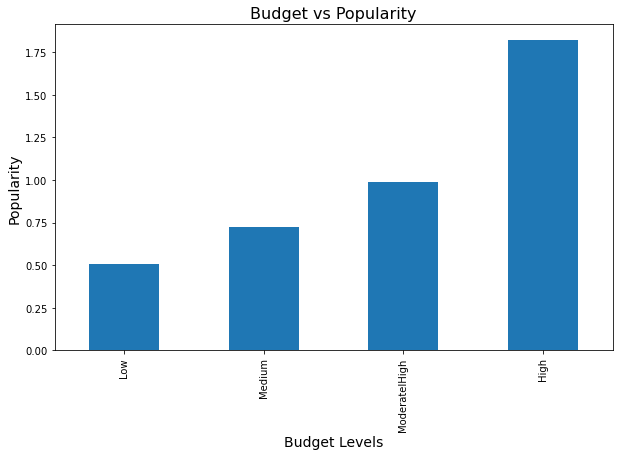

In [29]:
# Create a bar chart with proper labels
df.groupby(['budget_levels'],as_index='false')['popularity'].mean().plot(kind='bar',figsize = (10,6))
plt.title('Budget vs Popularity', fontsize=16)
plt.xlabel('Budget Levels',fontsize=14)
plt.ylabel('Popularity',fontsize=14)

### Research Question 3 (Which year has the highest release of movies?)
As we can see that 2014 had the highest release of movies with total of 700 movie.

In [31]:
# make group for each year and count the number of movies in each year
m_count = df.groupby('release_year').count()['id']
m_count.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

In [32]:
m_count.tail()

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

Text(0, 0.5, 'Number of Movies')

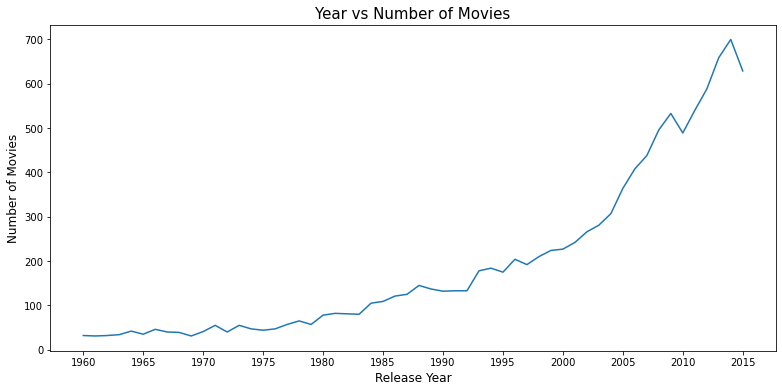

In [33]:
# Group each year and count the number of movies
# Create a line chart with proper labels
df.groupby('release_year').count()['id'].plot(kind='line',figsize = (13,6))
plt.xticks(np.arange(1960,2016,5))
plt.title("Year vs Number of Movies",fontsize = 15)
plt.xlabel('Release Year',fontsize = 12)
plt.ylabel('Number of Movies',fontsize = 12)

### Research Question 4 (Which genre has the highest release of movies?)
As shown in the bar chart below (Drama) is the genre that has the highest release of movies , next is (Comedy).

In [34]:
#concatenate all the rows of the genrs. 
s_data = df['genres'].str.cat(sep = '|')
c_data = pd.Series(s_data.split('|')).value_counts(ascending=True)  #Count the movies for each genre

Text(0, 0.5, 'Genres')

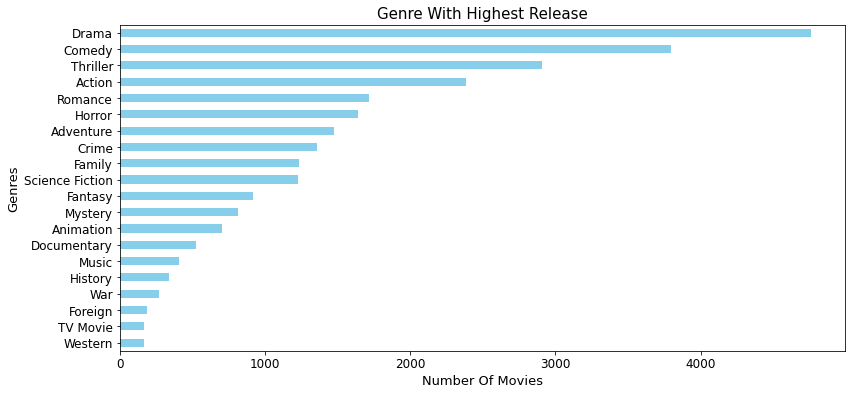

In [35]:
# Create a bar chart with proper labels
c_data.plot(kind= 'barh',figsize = (13,6),fontsize=12, color='skyblue')
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)

### Research Question 5 (Is there any relation between the Revenue of the movies and the Budget ?)
The correlation between Revenue and Budget is considered positive ,so when the revenue is high probebly the budget of a movie is high.

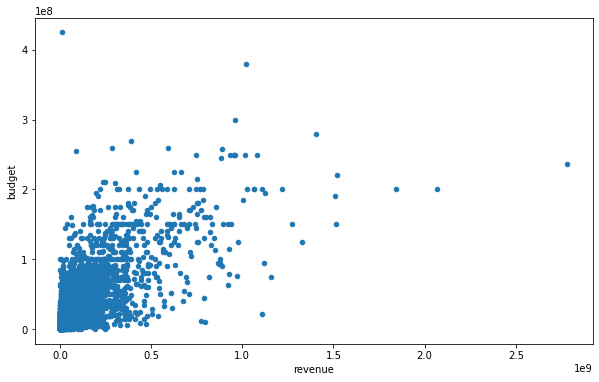

In [36]:
# A scatter plot to see the relation between revenue & budget 
df.plot(x='revenue' , y='budget',kind ='scatter',figsize = (10,6))

<a id='conclusions'></a>
## Conclusions

Finally lets summarize our investigation , first thing I did was wrangling and cleaning the data such as handling missing values , changing data types, dealing with duplicates etc. , Then I did some exploration that led me to these conclusions:

• The average duration of a movie is 102 minutes.

• There is a relation between the budget of the movie and its popularity , movies with high budget are more popular than the others.

• 2014 had the highest release of movies with total of 700 movie.

• (Drama) is the genre that has the highest release of movies , next is (Comedy).

• The correlation between Revenue and Budget is considered positive , so when the revenue is high probebly the budget of a movie is high too.

### Resources

https://stackoverflow.com/questions/26347412/drop-multiple-columns-in-pandas/26347456 , 
https://stackoverflow.com/questions/45416684/python-pandas-replace-multiple-columns-zero-to-nan?rq=1 , 
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.cat.html , 
https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.Series.str.cat.html , 
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html , 
https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html , 
https://github.com/justmarkham/pandas-videos , 
https://www.dataquest.io/blog/pandas-cheat-sheet/ , 
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html